<a href="https://colab.research.google.com/github/Zynab12/Zynab-Alshareef-SDA/blob/master/Sentiment_Analysis_(Amazon_Cell_Phone_Dataset)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis Using Amazon Cell Phones Reviews Dataset 

#### Load Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import textblob
from textblob import TextBlob, Word
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import seaborn as sns
import sys
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib.pyplot import figure
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#### Load the data and examine it.

In [ ]:
items = pd.read_csv("20191226-items.csv")
reviews = pd.read_csv("2019-1226-reviews.csv")

In [ ]:
# see head of the dataset
items.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


In [ ]:
# see head of the dataset
reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [ ]:
# observe shape of the dataset
print(items.shape)
print(reviews.shape)

(720, 10)
(67986, 8)


In [ ]:
Data = pd.merge(reviews, items, how="left", left_on="asin", right_on="asin")
Data

,asin,name,rating_x,date,verified,title_x,body,helpfulVotes,brand,title_y,url,image,rating_y,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00
67982,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00
67983,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN,Apple,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",https://www.amazon.com/Apple-iPhone-64GB-Gray-...,https://m.media-amazon.com/images/I/71yMgOenT5...,5.0,https://www.amazon.com/product-reviews/B081TJFVCJ,1,478.97,0.00


In [ ]:
Data.info

<bound method DataFrame.info of              asin               name  rating_x                date  verified  \
0      B0000SX2UC              Janet         3    October 11, 2005     False   
1      B0000SX2UC         Luke Wyatt         1     January 7, 2004     False   
2      B0000SX2UC             Brooke         5   December 30, 2003     False   
3      B0000SX2UC      amy m. teague         3      March 18, 2004     False   
4      B0000SX2UC      tristazbimmer         4     August 28, 2005     False   
...           ...                ...       ...                 ...       ...   
67981  B081H6STQQ              jande         5     August 16, 2019     False   
67982  B081H6STQQ            2cool4u         5  September 14, 2019     False   
67983  B081H6STQQ              simon         5       July 14, 2019     False   
67984  B081TJFVCJ  Tobiasz Jedrysiak         5   December 24, 2019      True   
67985  B0825BB7SG      Owen Gonzalez         5   December 11, 2019     False   

       

In [ ]:
Data.shape

(67986, 17)

In [ ]:
Data.rename(columns={"rating_x": "rating", "title_x": "title", "title_y": "item_title", "rating_y": "overall_rating"}, inplace=True)
Data

,asin,name,rating,date,verified,title,body,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00
67982,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00
67983,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN,Apple,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",https://www.amazon.com/Apple-iPhone-64GB-Gray-...,https://m.media-amazon.com/images/I/71yMgOenT5...,5.0,https://www.amazon.com/product-reviews/B081TJFVCJ,1,478.97,0.00


In [ ]:
Data.isnull().sum()

asin                  0
name                  2
rating                0
date                  0
verified              0
title                14
body                 21
helpfulVotes      40771
brand               200
item_title            0
url                   0
image                 0
overall_rating        0
reviewUrl             0
totalReviews          0
price                 0
originalPrice         0
dtype: int64

In [ ]:
Data = Data.dropna()
Data = Data.reset_index(drop=True)

## Creating a copy of data dataset for text analysis

In [ ]:
df_data = Data.copy()

In [ ]:
df_data.head()

,asin,name,rating,date,verified,title,body,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,price,originalPrice
0,B001AO4OUC,Elizabeth,4,"May 12, 2009",True,tough little phone,This phone isn't kidding when it says military...,1.0,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0,0.0
1,B001AO4OUC,"Ron Malinowski, Jr.",1,"November 19, 2012",True,Boost Mobile no Longer allows IDEN service,I bought this phone and found out IDEN phones ...,2.0,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0,0.0
2,B001AO4OUC,PENNY,4,"November 25, 2012",True,SIM CARD,PHONE DID NOT COME WITH A SIM CARD....INFORMAT...,1.0,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0,0.0
3,B001AO4OUC,Anthony L. Savarese,1,"October 18, 2009",True,Cell,Wouldn't know anything about the cell phone I ...,1.0,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0,0.0
4,B001AO4OUC,Yoda,4,"April 7, 2010",False,For a basic phone quite good,For someone needing a very basic phone and ser...,2.0,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0,0.0


In [ ]:
# Character count
df_data['char_count'] = df_data['title'].str.len()
df_data_sort_charcount = df_data.sort_values(by='char_count', ascending=False)
df_data_sort_charcount[['title', 'char_count']].head(10)

,title,char_count
11443,When I opened the box I was surprised to see h...,193
16972,When I opened the box I was surprised to see h...,193
15531,t-mobile recently upgraded or did something to...,192
5991,I am a Freedom (WIND was the earlier name) Mob...,185
14660,I am asking myself why am I spending over $800...,168
11841,I took it to a local phone repair service to d...,157
11738,I ordered the phone not knowing I could not pu...,154
14659,So I went to the Verizon store to buy a sim ca...,151
12730,I did hook it up to my straighttalk phone sim ...,145
19087,"Huawei P20lite ""is not sold in the USA' also a...",144


In [ ]:
#Word Count
df_data['word_count'] = df_data['title'].apply(lambda x: len(str(x).split(" ")))
df_data_sort_wordcount = df_data.sort_values(by='word_count', ascending=False)
df_data_sort_wordcount[['title','word_count']].head()

,title,word_count
5991,I am a Freedom (WIND was the earlier name) Mob...,38
11443,When I opened the box I was surprised to see h...,38
16972,When I opened the box I was surprised to see h...,38
15531,t-mobile recently upgraded or did something to...,36
14659,So I went to the Verizon store to buy a sim ca...,35


In [ ]:
# Special Character Count
# Number of hashtags in a reviews

df_data['hashtags'] = df_data['title'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df_data_sort_hashtags = df_data.sort_values(by='hashtags', ascending=False)
df_data_sort_hashtags[['title', 'hashtags']].head()

,title,hashtags
18639,Easily my #1 favorite android phone EVER,1
17953,#wonderful,1
13273,"Not unlocked,this is a Verizon phone ##",1
8235,IMEI # from Africa,1
9437,BAD IMEI #,1


In [ ]:
# Stopword Count
stop_words = stopwords.words('english')

df_data['stopwords'] = df_data['title'].apply(lambda x: len([i for i in x.split() if i in stop_words]))
df_data_sort_stopwords = df_data.sort_values(by='stopwords', ascending=False)
df_data_sort_stopwords[['title', 'stopwords']].head()

,title,stopwords
11443,When I opened the box I was surprised to see h...,18
14659,So I went to the Verizon store to buy a sim ca...,18
16972,When I opened the box I was surprised to see h...,18
15531,t-mobile recently upgraded or did something to...,17
5991,I am a Freedom (WIND was the earlier name) Mob...,17


In [ ]:
# Number Count
df_data['number_count'] = df_data['title'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df_data_sort_number_count = df_data.sort_values(by='number_count', ascending=False)
df_data_sort_number_count[['title', 'number_count']].head()

,title,number_count
9800,12 Months phone and 6 months battery warranty....,3
6587,The Note 4 or the new Note 8 are way better ph...,3
7669,"Phone is 5 stars, but not new as described, so...",3
15201,I have to recharge every 24 hours whereas my N...,3
3682,00 on 2 phones in the last 6 months and never ...,3


#### Convert the sentence to Lower case

In [ ]:
df_data['text_lower'] = df_data['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_data[['title', 'text_lower']].head()

,title,text_lower
0,tough little phone,tough little phone
1,Boost Mobile no Longer allows IDEN service,boost mobile no longer allows iden service
2,SIM CARD,sim card
3,Cell,cell
4,For a basic phone quite good,for a basic phone quite good


#### Stopwords Removal

In [ ]:
stop_words = stopwords.words('english')

df_data['text_stopwords'] = df_data['text_lower'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

df_data[['title', 'text_stopwords']].head()

,title,text_stopwords
0,tough little phone,tough little phone
1,Boost Mobile no Longer allows IDEN service,boost mobile longer allows iden service
2,SIM CARD,sim card
3,Cell,cell
4,For a basic phone quite good,basic phone quite good


#### Punctuation Removal

In [ ]:
df_data['text_punc'] = df_data['text_stopwords'].str.replace('[^\w\s]', '')
df_data[['title', 'text_punc']].head()

,title,text_punc
0,tough little phone,tough little phone
1,Boost Mobile no Longer allows IDEN service,boost mobile longer allows iden service
2,SIM CARD,sim card
3,Cell,cell
4,For a basic phone quite good,basic phone quite good


#### Common word removal

In [ ]:
# Frequency of common words in all the reviews

common_top20 = pd.Series(' '.join(df_data['text_punc']).split()).value_counts()[:20]
print(common_top20)


# Remove these top 20 freq words
common = list(common_top20.index)

df_data['text_comm_remv'] = df_data['text_punc'].apply(lambda x: " ".join(x for x in x.split() if x not in common))
df_data[['title','text_comm_remv']].head()

phone        8195
great        3629
stars        2001
good         1978
five         1458
best         1001
price         970
one           944
buy           944
love          928
battery       770
new           749
like          652
works         614
star          568
excellent     550
samsung       533
unlocked      518
nice          517
work          487
dtype: int64


,title,text_comm_remv
0,tough little phone,tough little
1,Boost Mobile no Longer allows IDEN service,boost mobile longer allows iden service
2,SIM CARD,sim card
3,Cell,cell
4,For a basic phone quite good,basic quite


#### Rare words removal

In [ ]:
# Frequency of common words in all the reviews
rare_top20 = pd.Series(" ".join(df_data['text_comm_remv']).split()).value_counts()[-20:]
rare_top20

# Remove these top 20 common words
rare = list(rare_top20.index)

df_data['text_rare_remv'] = df_data['text_comm_remv'].apply(lambda x: " ".join(x for x in x.split() if x not in rare))
df_data[['title','text_rare_remv']].head()

,title,text_rare_remv
0,tough little phone,tough little
1,Boost Mobile no Longer allows IDEN service,boost mobile longer allows iden service
2,SIM CARD,sim card
3,Cell,cell
4,For a basic phone quite good,basic quite


#### Spelling correction

In [ ]:
# Using textblob

df_data['text_rare_remv'][:10].apply(lambda x: str(TextBlob(x).correct()))

0                               tough little
1    boost mobile longer allows idea service
2                                   him card
3                                       cell
4                                basic quite
5                  terrible customer service
6                                           
7                                    ok that
8                                    product
9               people crazy give bad review
Name: text_rare_remv, dtype: object

#### Tokenization

In [ ]:
df_data['text_rare_remv'][:10].apply(lambda x: TextBlob(x).words)

0                                   [tough, little]
1    [boost, mobile, longer, allows, iden, service]
2                                       [sim, card]
3                                            [cell]
4                                    [basic, quite]
5                     [terrible, customer, service]
6                                                []
7                                       [ok, thats]
8                                         [product]
9                [people, crazy, give, bad, review]
Name: text_rare_remv, dtype: object

#### Stemming

In [ ]:
st = PorterStemmer()
df_data['text_rare_remv'][:10].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                             tough littl
1    boost mobil longer allow iden servic
2                                sim card
3                                    cell
4                              basic quit
5                   terribl custom servic
6                                        
7                                 ok that
8                                 product
9             peopl crazi give bad review
Name: text_rare_remv, dtype: object

####  Lemmatization 

In [ ]:
df_data['text_rare_remv'][:10].apply(lambda x: " ".join(Word(word) for word in x.split()))

0                               tough little
1    boost mobile longer allows iden service
2                                   sim card
3                                       cell
4                                basic quite
5                  terrible customer service
6                                           
7                                   ok thats
8                                    product
9               people crazy give bad review
Name: text_rare_remv, dtype: object

### Sentiment Analysis

Sentiment analysis is basically the process of determining the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral. The sentiment function of textblob returns two properties, polarity, and subjectivity. Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [ ]:
df_data['sentiment'] = df_data['title'][:20].apply(lambda x: TextBlob(x).sentiment[0])
df_data[['title','sentiment']].head(20)

,title,sentiment
0,tough little phone,-0.288194
1,Boost Mobile no Longer allows IDEN service,0.000000
2,SIM CARD,0.000000
3,Cell,0.000000
4,For a basic phone quite good,0.350000
5,Terrible Customer Service,-1.000000
6,Great phone,0.800000
7,"ok as phone, that's it",0.500000
8,Not a good product,-0.350000
9,this phone is great people are crazy to give a...,-0.225000


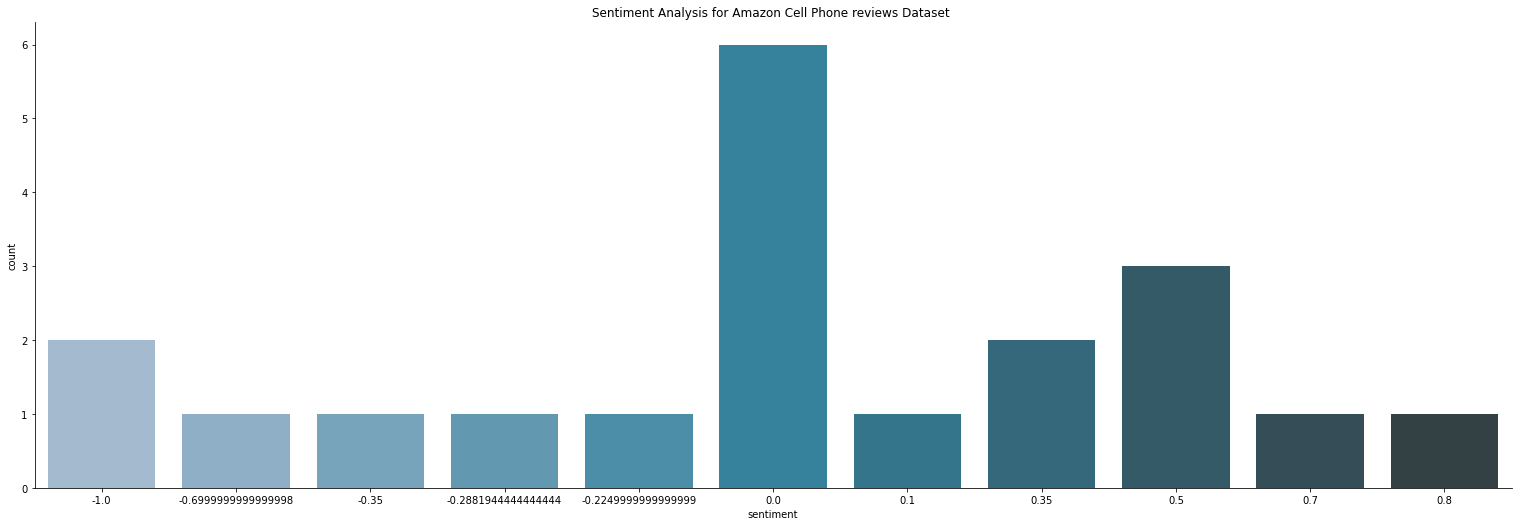

In [ ]:
sns.catplot(x="sentiment", data=df_data, kind="count", height=7, aspect=3, palette="PuBuGn_d")
plt.title("Sentiment Analysis for Amazon Cell Phone reviews Dataset ")
plt.show();

## Choose a Specific Brands to Build Model


### First Brand: Apple

In [ ]:
apple = df_data[df_data["brand"]=="Apple"].sort_values(by=["date"], ascending=False)
samsung = df_data[df_data["brand"]=="Samsung"].sort_values(by=["date"], ascending=False)

In [ ]:
apple[df_data['rating'] != 3]
apple['Positivity'] = np.where(apple['rating'] > 3, 1, 0)
cols = ['asin', 'name', 'rating', 'date','verified', 'title', 'helpfulVotes', 'brand', 'item_title','url','image','overall_rating','reviewUrl','totalReviews','price','originalPrice']
apple.drop(cols, axis=1, inplace=True)
apple.head()

<ipython-input-31-ddae786a0079>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,body,char_count,word_count,hashtags,stopwords,number_count,text_lower,text_stopwords,text_punc,text_comm_remv,text_rare_remv,sentiment,Positivity
17809,Phone came with no sign of wear in great condi...,18,2,0,0,0,satisfied customer,satisfied customer,satisfied customer,satisfied customer,satisfied customer,NaN,1
16854,I don’t want to buy it any more,22,5,0,2,0,battery life is so bad,battery life bad,battery life bad,life bad,life bad,NaN,0
12608,I love it! Works like new and exactly as descr...,24,4,0,0,0,"great product, like new!","great product, like new!",great product like new,product,product,NaN,1
12606,"Works perfect, easy to use with my cricket sim...",25,5,0,1,0,looks and works brand new,looks works brand new,looks works brand new,looks brand,looks brand,NaN,1
16598,"Absolutely new, just no earphones came in the box",17,2,0,0,0,excellent product,excellent product,excellent product,product,product,NaN,1


In [ ]:
apple.rename(columns={"body": "Review"}, inplace=True)
apple

,Review,char_count,word_count,hashtags,stopwords,number_count,text_lower,text_stopwords,text_punc,text_comm_remv,text_rare_remv,sentiment,Positivity
17809,Phone came with no sign of wear in great condi...,18,2,0,0,0,satisfied customer,satisfied customer,satisfied customer,satisfied customer,satisfied customer,NaN,1
16854,I don’t want to buy it any more,22,5,0,2,0,battery life is so bad,battery life bad,battery life bad,life bad,life bad,NaN,0
12608,I love it! Works like new and exactly as descr...,24,4,0,0,0,"great product, like new!","great product, like new!",great product like new,product,product,NaN,1
12606,"Works perfect, easy to use with my cricket sim...",25,5,0,1,0,looks and works brand new,looks works brand new,looks works brand new,looks brand,looks brand,NaN,1
16598,"Absolutely new, just no earphones came in the box",17,2,0,0,0,excellent product,excellent product,excellent product,product,product,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12382,I ordered the Iphone 7 plus 128gb gold and got...,11,2,0,0,0,some issues,issues,issues,issues,issues,NaN,0
11571,iPhone is wasn't unlocked.,23,4,0,1,0,iphone is not unlocked.,iphone unlocked.,iphone unlocked,iphone,iphone,NaN,0
14739,Much to my surprise this phone came completely...,14,2,0,0,0,very satisfied,satisfied,satisfied,satisfied,satisfied,NaN,1
12297,The phone did have scratches and a dent on it ...,11,2,0,0,0,three stars,three stars,three stars,three,three,NaN,0


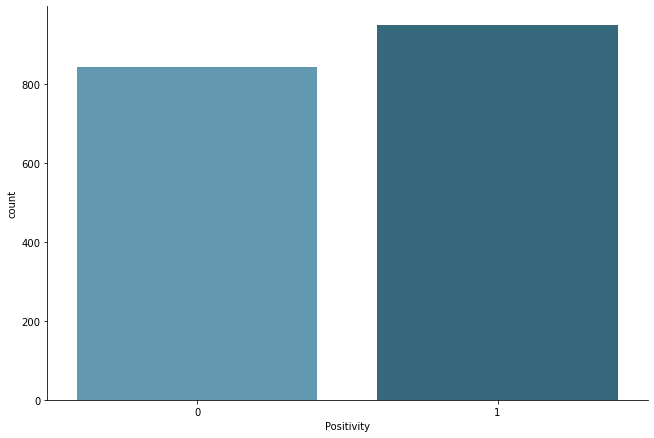

In [ ]:
sns.catplot(x="Positivity", data=apple, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

## Model Building using RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
x = apple['Review']
y = apple['Positivity']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)


from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier())])

text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

 ### Model Evaluation

In [ ]:
predictions = text_clf.predict(X_test)

print(confusion_matrix(y_test,predictions))
cm = confusion_matrix(y_test,predictions)
print(classification_report(y_test,predictions))

[[244  44]
 [ 24 280]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       288
           1       0.86      0.92      0.89       304

    accuracy                           0.89       592
   macro avg       0.89      0.88      0.88       592
weighted avg       0.89      0.89      0.88       592



In [ ]:
# Report the confusion matrix and showing accuracy result 
from sklearn import metrics
print(metrics.accuracy_score(y_test,predictions))

cm = metrics.accuracy_score(y_test,predictions)

0.8851351351351351


RandomForestClassifier gave accuracy of 88%

<AxesSubplot:>

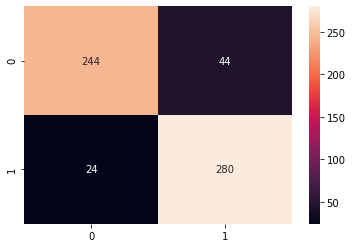

In [ ]:
from sklearn.metrics import confusion_matrix

labels=np.unique(y_test)

sns.heatmap(confusion_matrix(y_test, predictions, labels=labels), annot = True, fmt= '.0f')

### Second Brand: Samsung

In [ ]:
samsung[df_data['rating'] != 3]
samsung['Positivity'] = np.where(samsung['rating'] > 3, 1, 0)
cols = ['asin', 'name', 'rating', 'date', 'verified', 'title', 'helpfulVotes', 'brand', 'item_title','url','image','overall_rating','reviewUrl','totalReviews','price','originalPrice']
samsung.drop(cols, axis=1, inplace=True)
samsung.head()

<ipython-input-38-0e64e5fd58b5>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,body,char_count,word_count,hashtags,stopwords,number_count,text_lower,text_stopwords,text_punc,text_comm_remv,text_rare_remv,sentiment,Positivity
23365,Works like new.,29,7,0,2,1,so far all good after 5 month,far good 5 month,far good 5 month,far 5 month,far 5 month,NaN,1
23045,It's a great phone and came looking brand new....,51,11,0,4,0,this was the best place to get a good working ...,best place get good working phone,best place get good working phone,place get working,place get working,NaN,1
25548,I really like it,17,2,0,0,0,really satisfying,really satisfying,really satisfying,really satisfying,really satisfying,NaN,1
23304,Works like new.,29,7,0,2,1,so far all good after 5 month,far good 5 month,far good 5 month,far 5 month,far 5 month,NaN,1
9655,Very disappointed that during our search for a...,35,5,0,1,0,not compatable with verizon carrier,compatable verizon carrier,compatable verizon carrier,compatable verizon carrier,compatable verizon carrier,NaN,0


In [ ]:
samsung.rename(columns={"body": "Review"}, inplace=True)
samsung

,Review,char_count,word_count,hashtags,stopwords,number_count,text_lower,text_stopwords,text_punc,text_comm_remv,text_rare_remv,sentiment,Positivity
23365,Works like new.,29,7,0,2,1,so far all good after 5 month,far good 5 month,far good 5 month,far 5 month,far 5 month,NaN,1
23045,It's a great phone and came looking brand new....,51,11,0,4,0,this was the best place to get a good working ...,best place get good working phone,best place get good working phone,place get working,place get working,NaN,1
25548,I really like it,17,2,0,0,0,really satisfying,really satisfying,really satisfying,really satisfying,really satisfying,NaN,1
23304,Works like new.,29,7,0,2,1,so far all good after 5 month,far good 5 month,far good 5 month,far 5 month,far 5 month,NaN,1
9655,Very disappointed that during our search for a...,35,5,0,1,0,not compatable with verizon carrier,compatable verizon carrier,compatable verizon carrier,compatable verizon carrier,compatable verizon carrier,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,Great service. No issues .,10,2,0,0,0,five stars,five stars,five stars,,,NaN,1
2765,"TOP DOG! IMO, best phone out there. Great for ...",12,2,0,0,0,beast phone!,beast phone!,beast phone,beast,beast,NaN,1
2160,"Great phone, bought it to replace my galaxy no...",15,2,0,0,0,samsung rules!!,samsung rules!!,samsung rules,rules,rules,NaN,1
422,I bought two of these from Amazon. I am curren...,14,2,0,0,0,solid phone!!!,solid phone!!!,solid phone,solid,solid,NaN,1


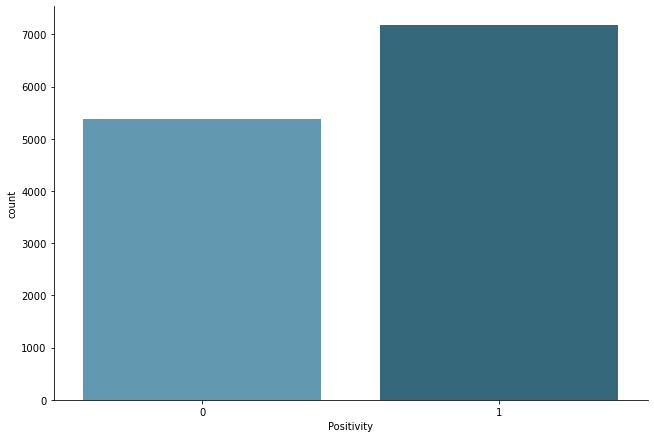

In [ ]:
sns.catplot(x="Positivity", data=samsung, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

## Model Building using RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
x = samsung['Review']
y = samsung['Positivity']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)


from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier())])

text_clf.fit(X_train,y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

### Model Evaluation

In [ ]:
predictions = text_clf.predict(X_test)

print(confusion_matrix(y_test,predictions))
cm = confusion_matrix(y_test,predictions)
print(classification_report(y_test,predictions))

[[1479  301]
 [ 210 2156]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1780
           1       0.88      0.91      0.89      2366

    accuracy                           0.88      4146
   macro avg       0.88      0.87      0.87      4146
weighted avg       0.88      0.88      0.88      4146



In [ ]:
print(metrics.accuracy_score(y_test,predictions))

0.876748673420164


<AxesSubplot:>

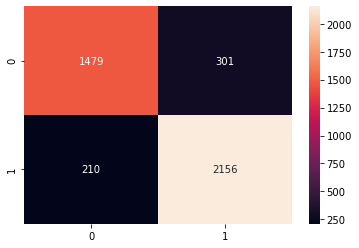

In [ ]:
from sklearn.metrics import confusion_matrix

labels=np.unique(y_test)

sns.heatmap(confusion_matrix(y_test, predictions, labels=labels), annot = True, fmt= '.0f')
